    The target is to predict the customer for loan or not  from the customer  previous loan record  


## Content

1. **[Import packages](#import_packages)**
2. **[Load data](#load_data)**
3. **[Data preparation](#data_preparation)**
    - 3.1 - [Dimensions of Dataset](#data_dimension)
    - 3.2 - [Statistical Summary](#Stat_sum)
    - 3.3 - [Dtypes](#Converting_Date)
    - 3.4 - [Checking Data Type and Missing Values](#check_data_type)
    - 3.5 - [Checking and changing of label encoder](#Indexing_with_Date)
    - 3.6 - [Recheck for object data type](#Indexing_with_Date1)
4. **[corelation check](#Indexing_with_Date2)**
5. **[Visualisation](#a1)**
    - 5.1 - [cat plot](#a2)
    - 5.2 - [Treatment of missing value](#a3)
6. **[Model Building](#a4)**
    - 6.1 - [splitting the dataset for traning](#a5)
    - 6.2 - [Training and evaluation](#a6)
    - 6.3 - [Predecting the model](#a7)
7. **[Conclusion](#a8)**
8. **[Appendices](#a9)**
9. **[Deployment,save the model as .pkl](#b1)**


<a id='import_packages'></a>
# 1. Import Packages  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt    
import seaborn as sns

<a id='load_data'></a>
# 2.load_data

### Once we imported the dataset, let’s view it using the below command .

In [2]:
data = pd.read_csv(r"C:/Users/ayush/OneDrive/Desktop/imarticus/capstone/final ML project/LoanApprovalPrediction.csv") 

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
593,LP002978,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,LP002979,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,LP002983,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,LP002984,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
597,LP002990,Female,No,0.0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# Data set contain customers previous loan data which has loan status lebelled yes or no. 

<a id='data_preparation'></a>
# 3. data_preparation

<a id='data_dimension'></a>
## 3.1 data_dimension

In [5]:
data.shape

(598, 13)

<a id='Stat_sum'></a>
## 3.2 Statistical Summary

In [6]:
data.describe(include='object').T

,count,unique,top,freq
Loan_ID,598,598,LP001002,1
Gender,598,2,Male,487
Married,598,2,Yes,388
Education,598,2,Graduate,465
Self_Employed,598,2,No,488
Property_Area,598,3,Semiurban,225
Loan_Status,598,2,Y,411


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Dependents,586.0,0.755973,1.007751,0.0,0.0,0.0,1.75,3.0
ApplicantIncome,598.0,5292.252508,5807.265364,150.0,2877.5,3806.0,5746.00,81000.0
CoapplicantIncome,598.0,1631.499866,2953.315785,0.0,0.0,1211.5,2324.00,41667.0
LoanAmount,577.0,144.968804,82.704182,9.0,100.0,127.0,167.00,650.0
Loan_Amount_Term,584.0,341.917808,65.205994,12.0,360.0,360.0,360.00,480.0
Credit_History,549.0,0.843352,0.363800,0.0,1.0,1.0,1.00,1.0


<a id='Converting_Date'></a>
## 3.3 Dtypes check

Get the number of columns of object datatype.

In [8]:
data.dtypes[data.dtypes == 'object']

Loan_ID          object
Gender           object
Married          object
Education        object
Self_Employed    object
Property_Area    object
Loan_Status      object
dtype: object

In [9]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
data.dtypes[data.dtypes != 'object']

Dependents           float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

### As Loan_ID is completely unique and not correlated with any of the other column, So we will drop it using .drop() function.


<a id='check_data_type'></a>
## 3.4 Missing value /null treatment

In [11]:
# Dropping Loan_ID column
data.drop(['Loan_ID'],axis=1,inplace=True)

In [12]:
data.isna().sum() 

Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

<a id='Indexing_with_Date'></a>
## 3.5 Checking and changing of label encoder

### Visualize all the unique values in columns using barplot. This will simply show which value is dominating as per our dataset.

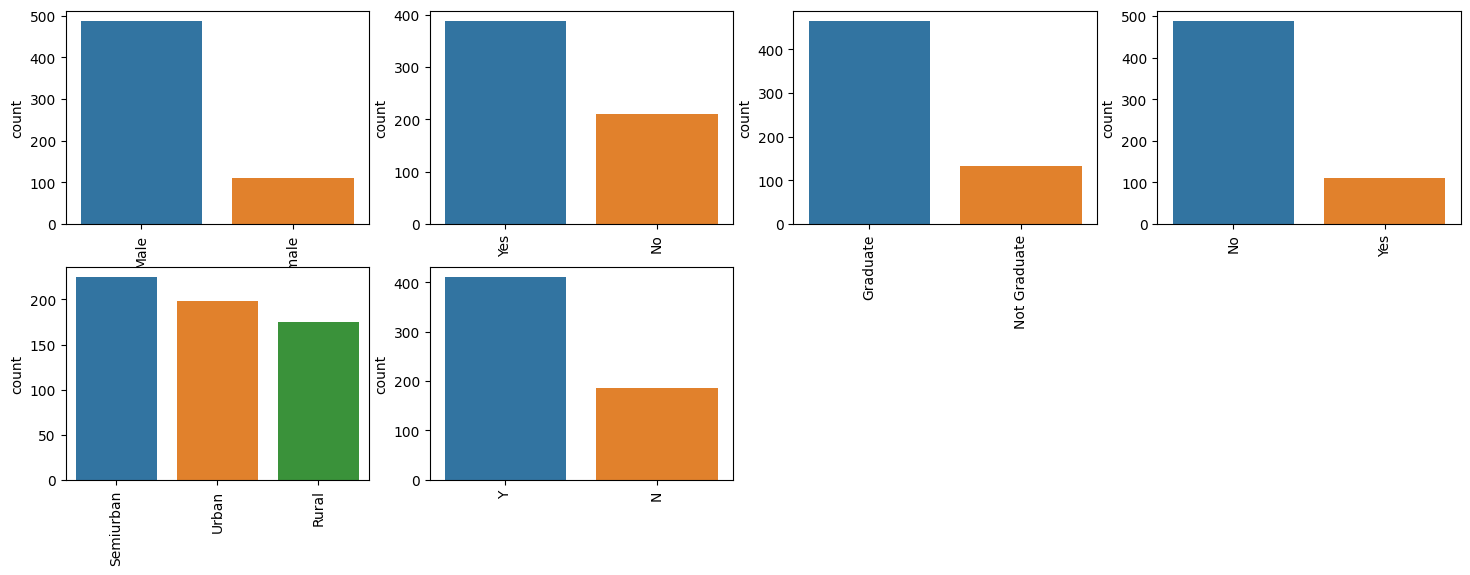

In [13]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
    y = data[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index +=1

### As all the categorical values are binary so we can use Label Encoder for all such columns and the values will change into int datatype.

In [14]:
# Import label encoder
from sklearn import preprocessing
    
# label_encoder object knows how 
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
  data[col] = label_encoder.fit_transform(data[col])


<a id='Indexing_with_Date1'></a>
## 3.6 Recheck for object datatype

### Again check the object datatype columns. Let’s find out if there is still any left.# Again check the object datatype columns. Let’s find out if there is still any left.

In [15]:
# To find the number of columns with 
# datatype==object
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


<a id='Indexing_with_Date2'></a>
# 4 Corelation check

<Axes: >

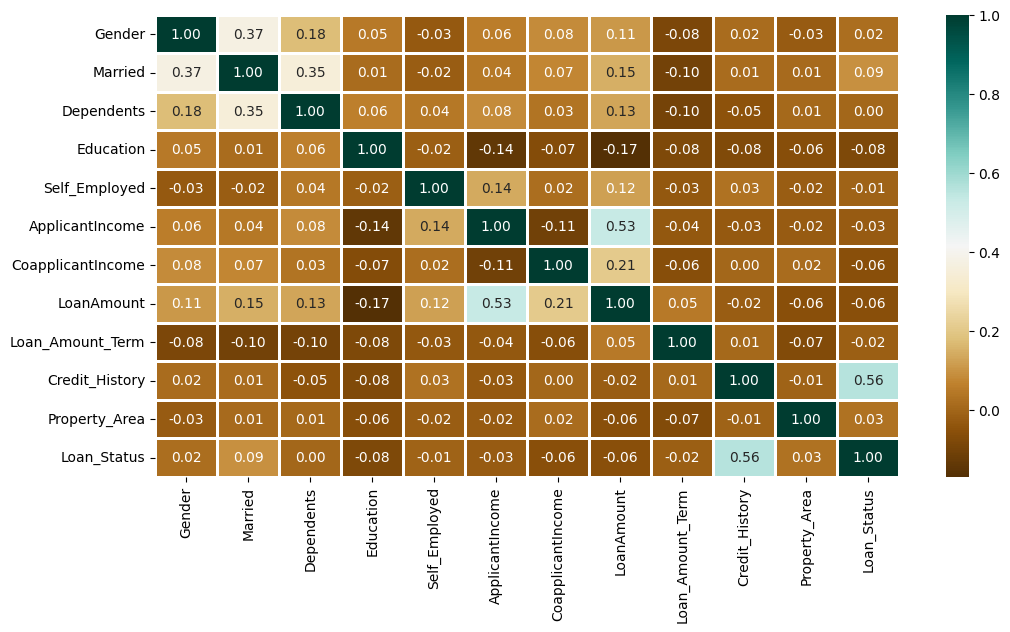

In [16]:
plt.figure(figsize=(12,6))
  
sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',
            linewidths=2,annot=True)

### The above heatmap is showing the correlation between Loan Amount and ApplicantIncome. It also shows that Credit_History has a high impact on Loan_Status.

Now we will use Catplot to visualize the plot for the Gender, and Marital Status of the applicant.


<a id='a1'></a>
# 5. visualisation

<a id='a2'></a>
## 5.1 cat plot

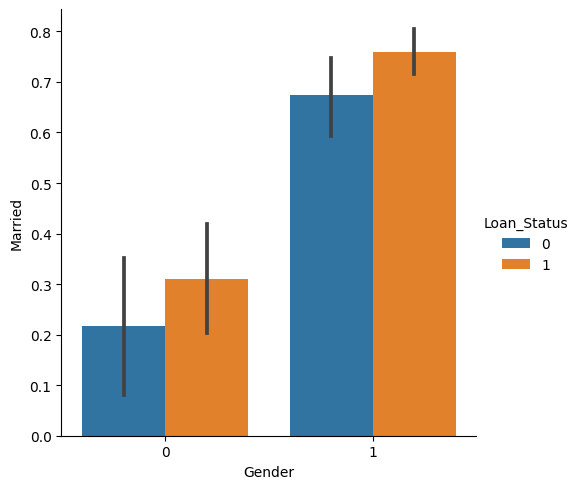

In [17]:
sns.catplot(x="Gender", y="Married",
            hue="Loan_Status", 
            kind="bar", 
            data=data)

<a id='a3'></a>
## 5.2 Treatment of missing

In [18]:
for col in data.columns:
  data[col] = data[col].fillna(data[col].mean()) 
    
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### As there is no missing value then we must proceed to model training.

<a id='a4'></a>
# 6.  Model Building


<a id='a5'></a>
## 6.1.  splitting the dataset for training

In [19]:
from sklearn.model_selection import train_test_split
  
X = data.drop(['Loan_Status'],axis=1)
Y = data['Loan_Status']
X.shape,Y.shape
  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.4,
                                                    random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((358, 11), (240, 11), (358,), (240,))

<a id='a6'></a>
## 6.2. Traning and Evaluation

##### Model Training and Evaluation
As this is a classification problem so we will be using these models : 

KNeighborsClassifiers
RandomForestClassifiers
Support Vector Classifiers (SVC)
Logistics Regression

###### To predict the accuracy we will use the accuracy score function from scikit-learn library.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
  
from sklearn import metrics
  
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators = 7,
                             criterion = 'entropy',
                             random_state =7)
svc = SVC()
lc = LogisticRegression()
  
# making predictions on the training set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    print("Accuracy score of ",
          clf.__class__.__name__,
          "=",100*metrics.accuracy_score(Y_train,Y_pred))

Accuracy score of  RandomForestClassifier = 98.04469273743017
Accuracy score of  KNeighborsClassifier = 78.49162011173185
Accuracy score of  SVC = 68.71508379888269
Accuracy score of  LogisticRegression = 80.44692737430168


<a id='a7'></a>
## 6.3. Predicting the model

#### Prediction on the test set:

In [21]:
# making predictions on the testing set
for clf in (rfc, knn, svc,lc):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print("Accuracy score of ",
          clf.__class__.__name__,"=",
          100*metrics.accuracy_score(Y_test,
                                     Y_pred))

Accuracy score of  RandomForestClassifier = 82.5
Accuracy score of  KNeighborsClassifier = 63.74999999999999
Accuracy score of  SVC = 69.16666666666667
Accuracy score of  LogisticRegression = 80.83333333333333


<a id='a8'></a>
# 7. Conclusion


    Random Forest Classifier is giving the best accuracy with an accuracy score of 82% 
    for the testing dataset. And to get much better results ensemble learning techniques like Bagging 
    and Boosting can also be used.

<a id='a9'></a>
# 8. Appendices

##### Python implementation of the Bagging classifier algorithm: 
    BaggingClassifier
       and Return the final predictions.

In [22]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
 
# # Load the dataset
# # digit = load_digits()
# # X, y = digit.data, digit.target
 
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# # Create the base classifier
base_classifier = DecisionTreeClassifier()
 
# Number of base models (iterations)
n_estimators =105
 
# Create the Bagging classifier
bagging_classifier = BaggingClassifier(base_estimator=base_classifier, n_estimators=n_estimators)
 
# Train the Bagging classifier
bagging_classifier.fit(X_train, Y_train)  
 
# Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)
 
# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

c:\users\ayush\appdata\local\programs\python\python38\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8166666666666667


In [23]:
from sklearn.metrics import confusion_matrix

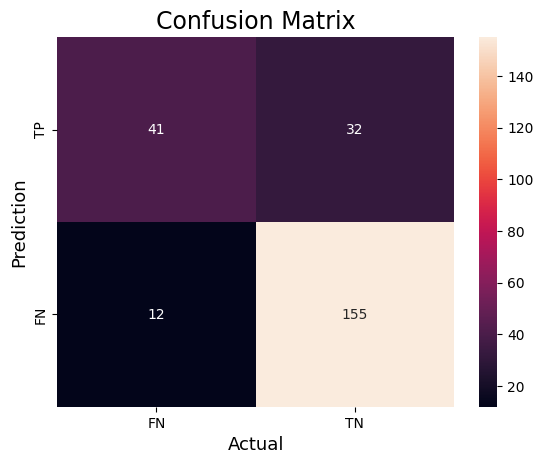

In [24]:
cm = confusion_matrix(Y_test,y_pred)
 
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
           xticklabels=['FN', 'TN'],
            yticklabels=['TP', 'FN'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [25]:
train_prob=pd.DataFrame(rfc.predict_proba(X_train),columns=["prob0","prob1"])

In [26]:
test_prob=pd.DataFrame(rfc.predict_proba(X_test),columns=["prob0","prob1"])
new_cutoff_predict1=np.where(test_prob["prob1"]>=.4,1,0)

In [27]:
import matplotlib.pyplot as plt
import sklearn 

In [42]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [39]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
def roc_curve(y,prob_1):
    fpr,tpr,thershold=metrics.roc_curve(y,prob_1)
    aucc=metrics.auc(fpr,tpr)
    plt.plot(fpr,tpr,label="AUC=%0.2f"%(aucc))
    plt.title("Roc curve")
    plt.xlabel("false positivr rate ")
    plt.ylabel("true postive rate")
    plt.legend()
    plt.show()

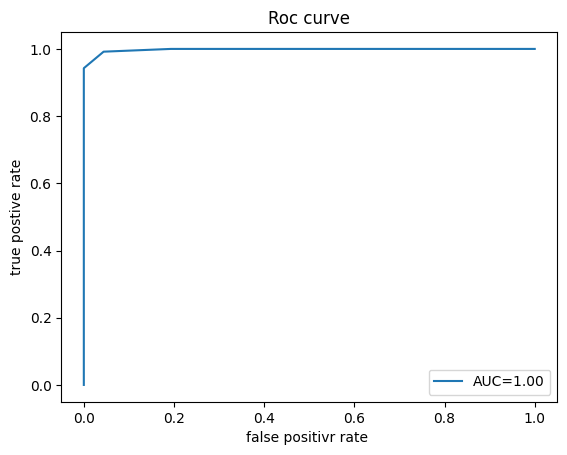

In [47]:
roc_curve(Y_train,prob_1=train_prob["prob1"])

<a id='b1'></a>
# 9.Deployment  ,pickle model file 

In [33]:
import os    
os.getcwd()  

'C:\\Users\\ayush\\Capstone_Project'

In [34]:
import pickle
pickle.dump(lc, open("Loans_to_students1.pkl", "wb"))